# Rastrigin, Rosenbrock, Gradiente y métodos heurísticos

---



https://github.com/syahrulhamdani/Gradient-Descent-for-Rosenbrock-Function/blob/master/rosenbrock.py

## Definición de funciones Rosenbrock

In [1]:
# Sacado de ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la función de Rosenbrock en 2D y 3D
def rosenbrock_2d(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_3d(x, y, z):
    return (1 - x)**2 + 100 * (y - x**2)**2 + (1 - y)**2 + 100 * (z - y**2)**2

# Definimos el gradiente de la función de Rosenbrock en 2D y 3D
def grad_rosenbrock_2d(x, y):
    return np.array([-2*(1-x) - 400*x*(y-x**2), 200*(y-x**2)])

def grad_rosenbrock_3d(x, y, z):
    return np.array([-2*(1-x) - 400*x*(y-x**2), -2*(1-y) + 200*(z-y**2) + 400*y*(y-x**2), 200*(z-y**2)])

# Definimos el método de descenso por gradiente
def gradient_descent(f, df, learning_rate, x0, max_iter=10000, tol=1e-6):
    x = x0
    xs = [x]
    for i in range(max_iter):
        grad = df(*x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        x = x - learning_rate * grad
        xs.append(x)
    return np.array(xs)

## Rosenbrock 2D



[[-1.91539798  0.49088899]
 [ 0.5251798   1.12646108]
 [ 0.70482654  0.95633163]
 ...
 [ 0.99851068  0.99701762]
 [ 0.99851128  0.99701881]
 [ 0.99851188  0.99702   ]] 10001


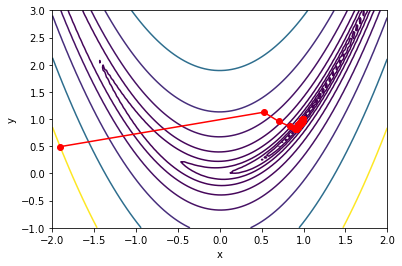

In [ ]:
# Sacado de ChatGPT

# Definimos la función de visualización en 2D
def plot_rosenbrock_2d(xs):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock_2d(X, Y)
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10))
    plt.plot(xs[:, 0], xs[:, 1], 'o-', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Generamos una condición inicial aleatoria y aplicamos el descenso por gradiente en 2D
# Generamos una condición inicial aleatoria en 2D
x0_2d = np.random.uniform(low=-2, high=2, size=2)

# Aplicamos el descenso por gradiente en 2D
xs_2d = gradient_descent(rosenbrock_2d, grad_rosenbrock_2d, learning_rate=0.001, x0=x0_2d, max_iter=10000, tol=1e-6)
print(xs_2d, len(xs_2d))

# Visualizamos los resultados en 2D
plot_rosenbrock_2d(xs_2d)

## Animación optimización Rosenbrock 2D Gradiente

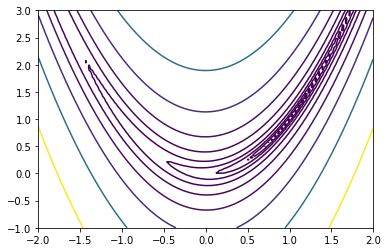

In [ ]:
# Taken from algoritmos_evol.ipynb
# Author: Juan David Ospina Arango

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)

fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim((-1, 3))
ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 10))
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')

In [ ]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(xs_2d[i*50:(i+1)*50])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

In [ ]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=10, blit=True)

In [ ]:
from IPython.display import HTML

HTML(anim.to_html5_video())

##Rosenbrock 3D

<ipython-input-8-27675c898b72>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


[[array([0.46789658, 0.80122987]) 34.19077271723628]
 [array([1.07266559, 0.5683088 ]) 33.912918953141244]
 [array([0.46789658, 0.80122987]) 34.190772717235575]
 [array([1.07266559, 0.5683088 ]) 33.91291895314152]
 [array([0.46789658, 0.80122987]) 34.190772717236136]
 [array([1.07266559, 0.5683088 ]) 33.91291895314124]
 [array([0.46789658, 0.80122987]) 34.19077271723556]
 [array([1.07266559, 0.5683088 ]) 33.91291895314151]
 [array([0.46789658, 0.80122987]) 34.190772717236136]]
the minimum is: 33.912918953141215 at point: [1.07266559 0.5683088 ]


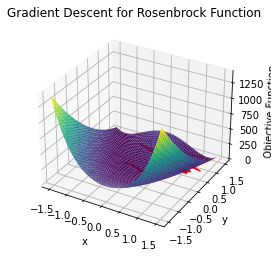

In [ ]:
# From a query in ChatGPT
# Author: ChatGPT

# First case: we set a=0 and b=100
def DerrivRosenbrock0 ( point ):
    dx = 2*point[0] - 400*point[0]*(point[1] - (point[0]**2))
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

# Second case: we set a=1 and b=100
def DerrivRosenbrock1 ( point ):
    dx = (-2*(1 - point[0]) - 400*(point[1] - (point[0]**2)**2))
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

def main():
    # set the learning rate first
    # this learning set is ad hoc corresponds to objective function
    lrate = 0.002
    # initialize a point
    a = np.array([-.5, .2])
    # set number of epochs (can be changed as you want)
    epoch = 100000
    # we have to record all tuples of the points and its function
    ai = []
    for i in range(epoch):
        # objective function for first case (uncomment code below)
        # f = (a[0]**2) + (100*((a[1] - a[0]**2)**2))
        # objective function for second case
        f = ((1 - a[0])**2) + (100*((a[1] - a[0]**2)**2))
        # append the point and its obj function to ai as 1D list
        ai.append([a,f])
        # compute its derrivative on point a
        # Derrivative for first case (uncomment code below)
        # fi = np.array(DerrivRosenbrock0(a))
        # Derrivative for second case
        fi = np.array(DerrivRosenbrock1(a))
        # set the new point based on its 
        a = a - np.dot(lrate,fi)
    
    # convert ai into a numpy array
    ai = np.array(ai)
    # print(ai.shape) 'uncomment this to check ai shape and delete this sentences'
    # print the last 10 of ai
    print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
    print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the axes
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1.5, 1.5, 100)
    X, Y = np.meshgrid(x, y)

    # Define the objective function
    Z = (1 - X)**2 + 100*((Y - X**2)**2)


    # Plot the function
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Plot the gradient descent path
    # Plot the gradient descent path
    x, y = zip(*ai[:, 0])
    ax.plot(x, y, c='r')


    # Add labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Objective Function')
    ax.set_title('Gradient Descent for Rosenbrock Function')

    plt.show()

if __name__ == '__main__':
    main()

##Animación Rosenbrock 3D

<ipython-input-29-cbc59ec67984>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


[[array([0.46789658, 0.80122987]) 34.19077271723628]
 [array([1.07266559, 0.5683088 ]) 33.912918953141244]
 [array([0.46789658, 0.80122987]) 34.190772717235575]
 [array([1.07266559, 0.5683088 ]) 33.91291895314152]
 [array([0.46789658, 0.80122987]) 34.190772717236136]
 [array([1.07266559, 0.5683088 ]) 33.91291895314124]
 [array([0.46789658, 0.80122987]) 34.19077271723556]
 [array([1.07266559, 0.5683088 ]) 33.91291895314151]
 [array([0.46789658, 0.80122987]) 34.190772717236136]]
the minimum is: 33.912918953141215 at point: [1.07266559 0.5683088 ]


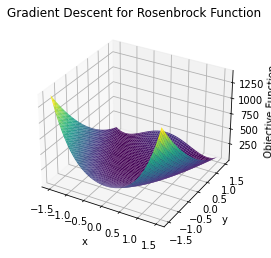

In [ ]:
# From ChatGPT

# set the learning rate first
# this learning set is ad hoc corresponds to objective function
lrate = 0.002
# initialize a point
a = np.array([-.5, .2])
# set number of epochs (can be changed as you want)
epoch = 100000
# we have to record all tuples of the points and its function
ai = []
for i in range(epoch):
    # objective function for first case (uncomment code below)
    # f = (a[0]**2) + (100*((a[1] - a[0]**2)**2))
    # objective function for second case
    f = ((1 - a[0])**2) + (100*((a[1] - a[0]**2)**2))
    # append the point and its obj function to ai as 1D list
    ai.append([a,f])
    # compute its derrivative on point a
    # Derrivative for first case (uncomment code below)
    # fi = np.array(DerrivRosenbrock0(a))
    # Derrivative for second case
    fi = np.array(DerrivRosenbrock1(a))
    # set the new point based on its 
    a = a - np.dot(lrate,fi)

# convert ai into a numpy array
ai = np.array(ai)
# print(ai.shape) 'uncomment this to check ai shape and delete this sentences'
# print the last 10 of ai
print(ai[-10:-1])
# the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the axes
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Define the objective function
Z = (1 - X)**2 + 100*((Y - X**2)**2)

# Plot the function
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot the gradient descent path
# Plot the gradient descent path
x, y = zip(*ai[:, 0])
z = ai[:, 1]
#ax.plot(x, y, c='r')
#ax.plot(x, y, z, lw=2, color='red', linestyle='-', marker='o')

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Objective Function')
ax.set_title('Gradient Descent for Rosenbrock Function')

scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')

In [ ]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    global ai
    Pob = ai[i*8:(i+1)*8]
    x = np.array([e[0] for e in Pob[:, 0]])
    y = np.array([e[1] for e in Pob[:, 0]])
    z = np.array([e for e in Pob[:, 1]])
    scatter.set_data(x,y)
    scatter.set_3d_properties(z)
    return (scatter,)

In [ ]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [ ]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Rastrigin 2D y 3D


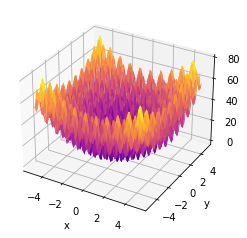

In [2]:
# Sacado de ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la función de Rastrigin en 2D y 3D
def rastrigin_2d(x, y):
    A = 10
    return A*2 + (x**2 - A*np.cos(2*np.pi*x)) + (y**2 - A*np.cos(2*np.pi*y))

def rastrigin_3d(x, y, z):
    A = 10
    return A*3 + (x**2 - A*np.cos(2*np.pi*x)) + (y**2 - A*np.cos(2*np.pi*y)) + (z**2 - A*np.cos(2*np.pi*z))

# Definimos el gradiente de la función de Rastrigin en 2D y 3D
def grad_rastrigin_2d(x, y):
    A = 10
    return np.array([2*x + 2*np.pi*A*np.sin(2*np.pi*x), 2*y + 2*np.pi*A*np.sin(2*np.pi*y)])

def grad_rastrigin_3d(x, y, z):
    A = 10
    return np.array([2*x + 2*np.pi*A*np.sin(2*np.pi*x), 2*y + 2*np.pi*A*np.sin(2*np.pi*y), 2*z + 2*np.pi*A*np.sin(2*np.pi*z)])

# Definimos el método de descenso por gradiente
def gradient_descent(f, df, learning_rate, x0, max_iter=10000, tol=1e-6):
    x = x0
    xs = [x]
    for i in range(max_iter):
        grad = df(*x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:
            break
        x = x - learning_rate * grad
        xs.append(x)
    return np.array(xs)

def plot_rastrigin_3d(xs):
    x = np.linspace(-5.12, 5.12, 100)
    y = np.linspace(-5.12, 5.12, 100)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin_2d(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs[:, 0], xs[:, 1], xs[:, 2], 'o-', color='red')
    ax.plot_surface(X, Y, Z, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

# Generamos una condición inicial aleatoria en 3D
x0_3d = np.random.uniform(low=-5.12, high=5.12, size=3)

# Aplicamos el descenso por gradiente en 3D
xs_3d = gradient_descent(rastrigin_3d, grad_rastrigin_3d, learning_rate=0.01, x0=x0_3d, max_iter=10000, tol=1e-6)

# Visualizamos los resultados en 3D
plot_rastrigin_3d(xs_3d)


## Gráfica Rastrigin 2D

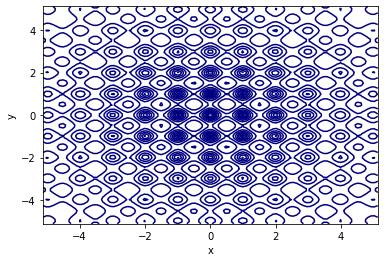

In [ ]:
# Sacado de ChatGPT

# Generamos una condición inicial aleatoria en 2D y aplicamos el descenso por gradiente
x0_2d = np.random.uniform(low=-5.12, high=5.12, size=2)
xs_2d = gradient_descent(rastrigin_2d, grad_rastrigin_2d, learning_rate=0.01, x0=x0_2d, max_iter=10000, tol=1e-6)

# Visualizamos los resultados en 2D
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
#ax.plot(xs_2d[:, 0], xs_2d[:, 1], 'o-', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')

## Animación Rastrigin 2D

In [ ]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(xs_2d[i*50:(i+1)*50])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter,)

In [ ]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=10, blit=True)

In [ ]:
from IPython.display import HTML

HTML(anim.to_html5_video())

##Gráfica Rastrigin 3D

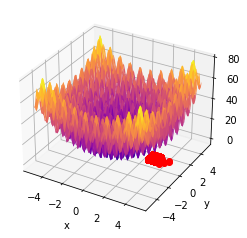

In [ ]:
# Sacado de ChatGPT

# Generamos una condición inicial aleatoria en 3D
x0_3d = np.random.uniform(low=-5.12, high=5.12, size=3)

# Aplicamos el descenso por gradiente en 3D
xs_3d = gradient_descent(rastrigin_3d, grad_rastrigin_3d, learning_rate=0.01, x0=x0_3d, max_iter=10000, tol=1e-6)

# Visualizamos los resultados en 3D
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs_3d[:, 0], xs_3d[:, 1], xs_3d[:, 2], 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Animación Rastrigin 3D

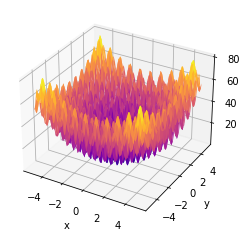

In [98]:
# Sacado de ChatGPT

# Generamos una condición inicial aleatoria en 3D
x0_3d = np.random.uniform(low=-5.12, high=5.12, size=3)

# Aplicamos el descenso por gradiente en 3D
xs_3d = gradient_descent(rastrigin_3d, grad_rastrigin_3d, learning_rate=0.01, x0=x0_3d, max_iter=10000, tol=1e-6)

# Visualizamos los resultados en 3D
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(xs_3d[:, 0], xs_3d[:, 1], xs_3d[:, 2], 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')

In [ ]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    global xs_3d
    Pob = xs_3d[i*8:(i+1)*8]
    x = np.array([e for e in Pob[:, 0]])
    y = np.array([e for e in Pob[:, 1]])
    z = np.array([e for e in Pob[:, 2]])
    scatter.set_data(x,y)
    scatter.set_3d_properties(z)
    return (scatter,)

In [ ]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [ ]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Evolución diferencial

https://machinelearningmastery.com/differential-evolution-from-scratch-in-python/


In [7]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import numpy as np
from matplotlib import pyplot
 
 
# define objective function
def rast2(x):
    A = 10
    return A*2 + (x[0]**2 - A*np.cos(2*np.pi*x[0])) + (x[1]**2 - A*np.cos(2*np.pi*x[1]))

def rast3(x):
    A = 10
    n = len(x)
    sum_term = 0.0
    for i in range(n):
        sum_term += x[i]**2 - A*np.cos(2*np.pi*x[i])
    return A*n + sum_term
 
def rosen2(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosen3(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2 + (1 - x[1])**2 + 100 * (x[2] - x[1]**2)**2

# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])
 
 
# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound
 
 
# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial
 
 
def differential_evolution(pop_size, bounds, iter, F, cr, obj):
    points = []
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    # initialise list to store the objective function value at each iteration
    obj_iter = list()
    # run iterations of the algorithm
    for i in range(iter):
        # iterate over all candidate solutions
        for j in range(pop_size):
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            # report progress at each iteration
            points.append(around(best_vector, decimals=5))
            #print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter, points]


## Evolución diferencial 2D para Rastrigin

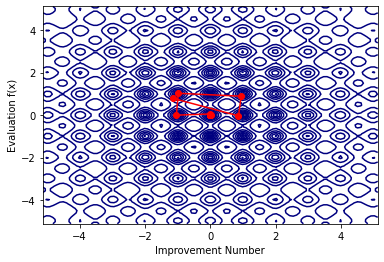

In [9]:
# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7
 
# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr, rast2)
#print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
x = [v[0] for v in solution[3]]
y = [v[1] for v in solution[3]]
# line plot of best objective function values
ax.plot(x, y, 'o-', color='red')

pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

## Animación Rastrigin 2D Evolución diferencial

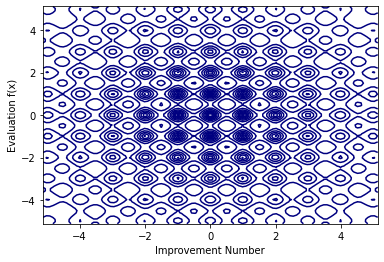

In [13]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
x = [v[0] for v in solution[3]]
y = [v[1] for v in solution[3]]
# line plot of best objective function values
#ax.plot(x, y, 'o-', color='red')

pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
pyplot.show()

In [14]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [42]:
# animation function. This is called sequentially
def animate(i):
    global x
    global y
    X = np.array(x[i:(i+1)])
    Y = np.array(y[i:(i+1)])
    scatter.set_data(X,Y)
    return (scatter,)

In [45]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=30, blit=True)

In [46]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica Rastrigin 3D con evolución diferencial

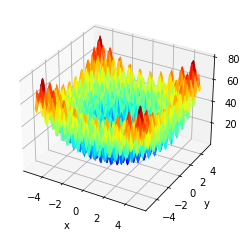

In [79]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7

# perform differential evolution
solution3d = differential_evolution(pop_size, bounds, iter, F, cr,rast3)
#print('\nSolution: f([%s]) = %.5f' % (around(solution3d[0], decimals=5), solution3d[1]))

# create a meshgrid of points to evaluate the function in 3D
x = y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rast3([X, Y])

x = [v[0] for v in solution3d[3]]
y = [v[1] for v in solution3d[3]]
z = [v[2] for v in solution3d[3]]
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x, y, z, 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Animación Rastrigin 3D Evolución diferencial

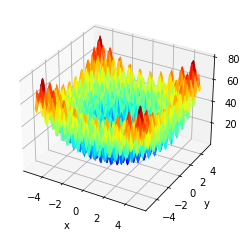

In [50]:
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot(x, y, z, 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [71]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [80]:
# animation function. This is called sequentially
def animate(i):
    global x
    global y
    global z
    X = np.array(x[i:(i+1)])
    Y = np.array(y[i:(i+1)])
    Z = np.array(z[i:(i+1)])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [81]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [82]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica Rosenbrock 2D con evolución diferencial

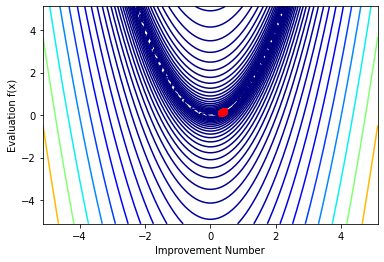

In [84]:
solution = differential_evolution(pop_size, bounds, iter, F, cr, rosen2)
#print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
x = [v[0] for v in solution[3]]
y = [v[1] for v in solution[3]]
# line plot of best objective function values
ax.plot(x, y, 'o-', color='red')

pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

## Animación de Rosenbrock 2D con evolución diferencial

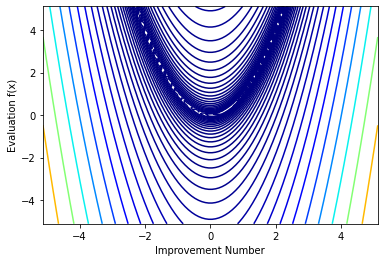

In [91]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
x = [v[0] for v in solution[3]]
y = [v[1] for v in solution[3]]
# line plot of best objective function values
# ax.plot(x, y, 'o-', color='red')

pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
pyplot.show()

In [92]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [93]:
# animation function. This is called sequentially
def animate(i):
    global x
    global y
    X = np.array(x[i:(i+1)])
    Y = np.array(y[i:(i+1)])
    scatter.set_data(X,Y)
    return (scatter,)

In [94]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=30, blit=True)

In [95]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica de Rosenbrock 3D con evolución diferencial


Solution: f([[0.53308 0.28332 0.07756]]) = 0.73245


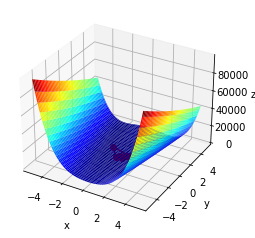

In [99]:
# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7

solution3d = differential_evolution(pop_size, bounds, iter, F, cr, rosen3)
print('\nSolution: f([%s]) = %.5f' % (around(solution3d[0], decimals=5), solution3d[1]))

# create a meshgrid of points to evaluate the function in 3D
x = y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosen2([X, Y])

x = [v[0] for v in solution3d[3]]
y = [v[1] for v in solution3d[3]]
z = [v[2] for v in solution3d[3]]
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x, y, z, 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Animación de Rosenbrock 3D con evolución diferencial

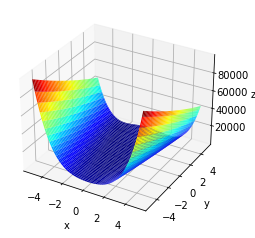

In [101]:
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot(x, y, z, 'o-', color='red')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [102]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [103]:
# animation function. This is called sequentially
def animate(i):
    global x
    global y
    global z
    X = np.array(x[i:(i+1)])
    Y = np.array(y[i:(i+1)])
    Z = np.array(z[i:(i+1)])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [104]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [105]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Optimización por enjambre de partículas (PSO) en 2D

In [160]:
# Sacado de ChatGPT

import random
import math

class Particle:
    def __init__(self, func):
        self.position = [random.uniform(-5, 5), random.uniform(-5, 5)]
        self.velocity = [random.uniform(-1, 1), random.uniform(-1, 1)]
        self.best_position = self.position[:]
        self.best_fitness = math.inf
        self.fitness = func(*self.position)

class Swarm:
    def __init__(self, n_particles, func):
        self.n_particles = n_particles
        self.particles = [Particle(func) for _ in range(n_particles)]
        self.best_position = self.particles[0].position[:]
        self.best_fitness = math.inf

    def update(self, func):
        for particle in self.particles:
            for i in range(2):
                particle.velocity[i] += random.uniform(0, 1) * (particle.best_position[i] - particle.position[i]) \
                                       + random.uniform(0, 1) * (self.best_position[i] - particle.position[i])
                particle.position[i] += particle.velocity[i]

            particle.fitness = func(*particle.position)

            if particle.fitness < particle.best_fitness:
                particle.best_position = particle.position[:]
                particle.best_fitness = particle.fitness

            if particle.fitness < self.best_fitness:
                self.best_position = particle.position[:]
                self.best_fitness = particle.fitness

def test_pso(func):
    swarm = Swarm(n_particles=20, func=func)
    positions = []
    for i in range(50):
        swarm.update(func)
        positions.append([particle.position for particle in swarm.particles])
    return positions, swarm.best_position, swarm.best_fitness

## Gráfica de Rosenbrock 2D con enjambre de partículas

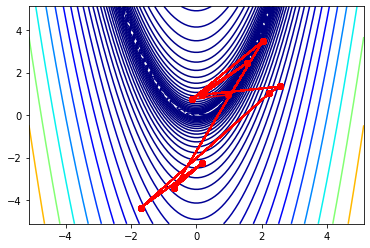

In [163]:
pos, best, fit = test_pso(rosenbrock_2d)
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
points = []
for i in pos:
  for point in i:
    if (point[0] >= -5 and point[0] <= 5) and (point[1] >= -5 and point[1] <= 5):
      points.append(point)
points.append(best)
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points] 
ax.plot(xPoints, yPoints,'o-', color='red')
plt.show()

## Animación Rosenbrock 2D por enjambre de partículas

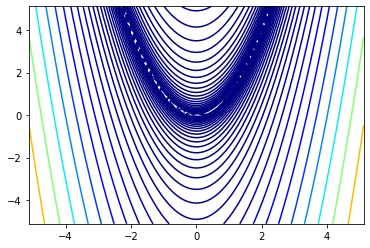

In [169]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points] 
#ax.plot(xPoints, yPoints,'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [170]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [174]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    X = np.array(xPoints[i*8:(i+1)*8])
    Y = np.array(yPoints[i*8:(i+1)*8])
    scatter.set_data(X,Y)
    return (scatter,)

In [177]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=30, blit=True)

In [178]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica de Rastrigin en 2D con enjambre de partículas


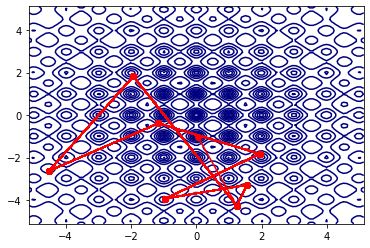

In [179]:
pos, best, fit = test_pso(rastrigin_2d)
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
points = []
for i in pos:
  for point in i:
    if (point[0] >= -5 and point[0] <= 5) and (point[1] >= -5 and point[1] <= 5):
      points.append(point)
points.append(best)
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points] 
ax.plot(xPoints, yPoints,'o-', color='red')
plt.show()

## Animación de Rastrigin 2D con enjambre de partículas

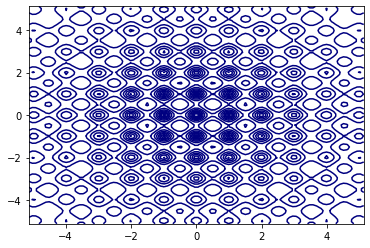

In [185]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points] 
#ax.plot(xPoints, yPoints,'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [186]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [193]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    X = np.array(xPoints[i*5:(i+1)*5])
    Y = np.array(yPoints[i*5:(i+1)*5])
    scatter.set_data(X,Y)
    return (scatter,)

In [194]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=30, blit=True)

In [195]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Optimización por enjambre de partículas (PSO) en 3D

In [198]:
# Sacado de ChatGPT

class Particle:
    def __init__(self, func):
        self.position = [random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5)]
        self.velocity = [random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]
        self.best_position = self.position[:]
        self.best_fitness = math.inf
        self.fitness = func(*self.position)

class Swarm:
    def __init__(self, n_particles, func):
        self.n_particles = n_particles
        self.particles = [Particle(func) for _ in range(n_particles)]
        self.best_position = self.particles[0].position[:]
        self.best_fitness = math.inf

    def update(self, func):
        for particle in self.particles:
            for i in range(3):
                particle.velocity[i] += random.uniform(0, 1) * (particle.best_position[i] - particle.position[i]) \
                                       + random.uniform(0, 1) * (self.best_position[i] - particle.position[i])
                particle.position[i] += particle.velocity[i]

            particle.fitness = func(*particle.position)

            if particle.fitness < particle.best_fitness:
                particle.best_position = particle.position[:]
                particle.best_fitness = particle.fitness

            if particle.fitness < self.best_fitness:
                self.best_position = particle.position[:]
                self.best_fitness = particle.fitness

def test_pso_3D(func):
    swarm = Swarm(n_particles=20, func=func)
    positions = []
    for i in range(50):
        swarm.update(func)
        positions.append([particle.position for particle in swarm.particles])
    return positions, swarm.best_position, swarm.best_fitness

## Gráfica de Rosenbrock 3D con enjambre de partículas

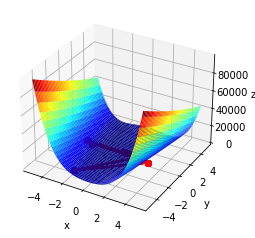

In [201]:
pos, best, fit = test_pso_3D(rosenbrock_3d)
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
points = []
for i in pos:
  for point in i:
    if (point[0] >= -5 and point[0] <= 5) and (point[1] >= -5 and point[1] <= 5):
      points.append(point)
points.append(best)
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
plt.show()

## Animación de Rosenbrock 3D con enjambre de partículas

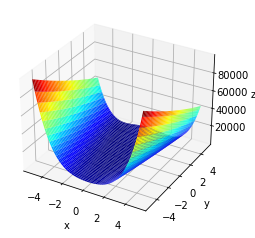

In [208]:
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [209]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [213]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    global zPoints
    X = np.array(xPoints[i*5:(i+1)*5])
    Y = np.array(yPoints[i*5:(i+1)*5])
    Z = np.array(zPoints[i*5:(i+1)*5])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [214]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [215]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica de Rastrigin 3D con enjambre de partículas

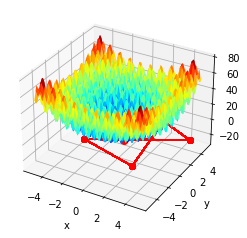

In [216]:
pos, best, fit = test_pso_3D(rastrigin_3d)
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
points = []
for i in pos:
  for point in i:
    if (point[0] >= -5 and point[0] <= 5) and (point[1] >= -5 and point[1] <= 5):
      points.append(point)
points.append(best)
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
plt.show()

## Animación de Rastrigin 3D con enjambre de partículas

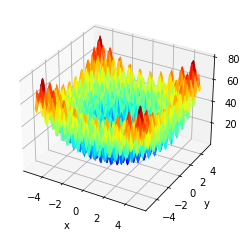

In [217]:
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [218]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [236]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    global zPoints
    X = np.array(xPoints[i*2:(i+1)*2])
    Y = np.array(yPoints[i*2:(i+1)*2])
    Z = np.array(zPoints[i*2:(i+1)*2])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [241]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=30, blit=True)

In [242]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Algoritmo evolutivo para 2D: algoritmo genético

In [ ]:
# Sacado de ChatGPT

import random
import math

class Individual:
    def __init__(self, x, y, func):
        self.x = x
        self.y = y
        self.fitness = func(x, y)

def create_population(size, func):
    population = []
    for i in range(size):
        x = random.uniform(-5, 5)
        y = random.uniform(-5, 5)
        population.append(Individual(x, y, func))
    return population

def selection(population):
    sorted_pop = sorted(population, key=lambda x: x.fitness)
    return sorted_pop[:int(len(sorted_pop)/2)]

def crossover(parent1, parent2, func):
    x = (parent1.x + parent2.x) / 2
    y = (parent1.y + parent2.y) / 2
    child = Individual(x, y, func)
    return child

def mutation(individual, rate, func):
    if random.random() < rate:
        individual.x += random.uniform(-1, 1)
    if random.random() < rate:
        individual.y += random.uniform(-1, 1)
    individual.fitness = func(individual.x, individual.y)
    return individual

def genetic_algorithm(population_size, mutation_rate, num_generations, func):
    population = create_population(population_size, func)
    solutions = []
    for i in range(num_generations):
        parents = selection(population)
        offspring = []
        for j in range(int(population_size/2)):
            parent1 = parents[random.randint(0, len(parents)-1)]
            parent2 = parents[random.randint(0, len(parents)-1)]
            child = crossover(parent1, parent2, func)
            offspring.append(mutation(child, mutation_rate, func))
            offspring.append(mutation(crossover(parent2, parent1, func), mutation_rate, func))
        population = parents + offspring
        best_individual = min(population, key=lambda x: x.fitness)
        solutions.append((best_individual.x, best_individual.y, best_individual.fitness))
    return solutions

## Gráfica de Rosenbrock 2D con algoritmo genético

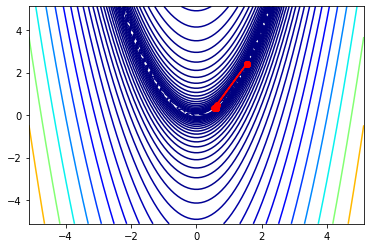

In [6]:
solutions = genetic_algorithm(population_size=100, mutation_rate=0.1, num_generations=100, func=rosenbrock_2d)
points = []
for i, sol in enumerate(solutions):
    points.append((sol[0], sol[1]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
ax.plot(xPoints, yPoints,'o-', color='red')
plt.show()

## Animación de Rosenbrock 2D con algoritmo genético

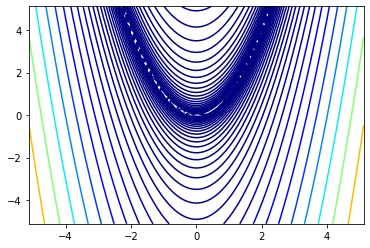

In [7]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
#ax.plot(xPoints, yPoints,'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [8]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [9]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    X = np.array(xPoints[i*8:(i+1)*8])
    Y = np.array(yPoints[i*8:(i+1)*8])
    scatter.set_data(X,Y)
    return (scatter,)

In [10]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=30, blit=True)

In [11]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica de Rastrigin 2D con algoritmo genético

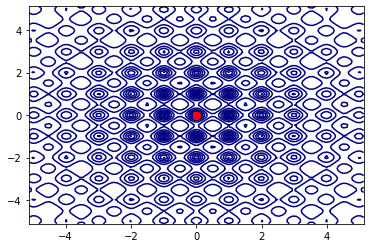

In [13]:
solutions = genetic_algorithm(population_size=100, mutation_rate=0.1, num_generations=100, func=rastrigin_2d)
points = []
for i, sol in enumerate(solutions):
    points.append((sol[0], sol[1]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
ax.plot(xPoints, yPoints,'o-', color='red')
plt.show()

## Animación de Rastrigin 2D con algoritmo genético

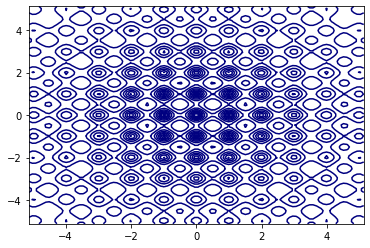

In [14]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
#ax.plot(xPoints, yPoints,'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [15]:
# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

In [16]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    X = np.array(xPoints[i*8:(i+1)*8])
    Y = np.array(yPoints[i*8:(i+1)*8])
    scatter.set_data(X,Y)
    return (scatter,)

In [17]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=30, blit=True)

In [18]:
from IPython.display import HTML

HTML(anim.to_html5_video())

##Algoritmo evolutivo en 3D: algoritmo genético

In [29]:
# Sacado de ChatGPT

import random
import math

class Individual:
    def __init__(self, x, y, z, func):
        self.x = x
        self.y = y
        self.z = z
        self.fitness = func(x, y, z)

def create_population(size, func):
    population = []
    for i in range(size):
        x = random.uniform(-5, 5)
        y = random.uniform(-5, 5)
        z = random.uniform(-5, 5)
        population.append(Individual(x, y, z, func))
    return population

def selection(population):
    sorted_pop = sorted(population, key=lambda x: x.fitness)
    return sorted_pop[:int(len(sorted_pop)/2)]

def crossover(parent1, parent2, func):
    x = (parent1.x + parent2.x) / 2
    y = (parent1.y + parent2.y) / 2
    z = (parent1.z + parent2.z) / 2
    child = Individual(x, y, z, func)
    return child

def mutation(individual, rate, func):
    if random.random() < rate:
        individual.x += random.uniform(-1, 1)
    if random.random() < rate:
        individual.y += random.uniform(-1, 1)
    if random.random() < rate:
        individual.z += random.uniform(-1, 1)
    individual.fitness = func(individual.x, individual.y, individual.z)
    return individual

def genetic_algorithm_3d(population_size, mutation_rate, num_generations, func):
    population = create_population(population_size, func)
    solutions = []
    for i in range(num_generations):
        parents = selection(population)
        offspring = []
        for j in range(int(population_size/2)):
            parent1 = parents[random.randint(0, len(parents)-1)]
            parent2 = parents[random.randint(0, len(parents)-1)]
            child = crossover(parent1, parent2, func)
            offspring.append(mutation(child, mutation_rate, func))
            offspring.append(mutation(crossover(parent2, parent1, func), mutation_rate, func))
        population = parents + offspring
        best_individual = min(population, key=lambda x: x.fitness)
        solutions.append((best_individual.x, best_individual.y, best_individual.z, best_individual.fitness))
    return solutions

## Gráfico de Rosenbrock 3D con algoritmo genético

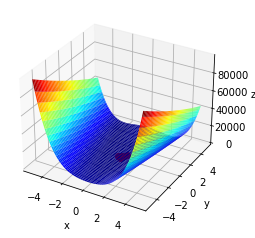

In [20]:
solutions = genetic_algorithm_3d(population_size=100, mutation_rate=0.1, num_generations=100, func=rosenbrock_3d)
points = []
for i, sol in enumerate(solutions):
    points.append((sol[0], sol[1], sol[2]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
plt.show()

## Animación de Rosenbrock 3D con algoritmo genético

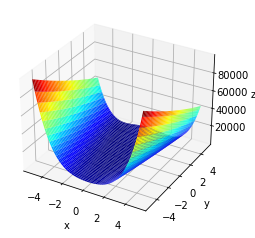

In [23]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
#ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [24]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [25]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    global zPoints
    X = np.array(xPoints[i*5:(i+1)*5])
    Y = np.array(yPoints[i*5:(i+1)*5])
    Z = np.array(zPoints[i*5:(i+1)*5])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [26]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [27]:
from IPython.display import HTML

HTML(anim.to_html5_video())

## Gráfica de Rastrigin 3D con algoritmo genético

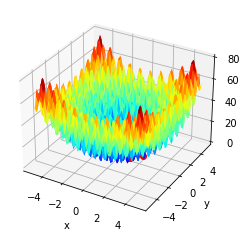

In [42]:
solutions = genetic_algorithm_3d(population_size=100, mutation_rate=0.1, num_generations=100, func=rastrigin_3d)
points = []
for i, sol in enumerate(solutions):
    points.append((sol[0], sol[1], sol[2]))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
plt.show()

## Animación de Rastrigin 3D con algoritmo genético

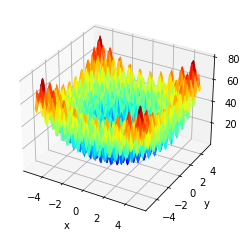

In [43]:
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)
# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

xPoints = [point[0] for point in points]
yPoints = [point[1] for point in points]
zPoints = [point[2] for point in points]
#ax.plot(xPoints, yPoints, zPoints, 'o-', color='red')
scatter, = ax.plot([], [], lw=2, color='red', linestyle='-', marker='o')
plt.show()

In [44]:
def init():
    scatter.set_data([], [])
    return (scatter,)

In [45]:
# animation function. This is called sequentially
def animate(i):
    global xPoints
    global yPoints
    global zPoints
    X = np.array(xPoints[i*5:(i+1)*5])
    Y = np.array(yPoints[i*5:(i+1)*5])
    Z = np.array(zPoints[i*5:(i+1)*5])
    scatter.set_data(X,Y)
    scatter.set_3d_properties(Z)
    return (scatter,)

In [46]:
from matplotlib import animation, rc

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

In [47]:
from IPython.display import HTML

HTML(anim.to_html5_video())